In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import precision_score, roc_curve, auc, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('../../../../archive/Limited_high_diamond.csv')

In [4]:
df

,blueWins,blueWardsPlaced,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueCSPerMin,...,blueHas39,redHas39,blueHas517,redHas517,blueMaxLevel,blueMinLevel,blueSTDLevels,redMaxLevel,redMinLevel,redSTDLevels
0,0,28,1,9,11,0,0,0,6.6,19.5,...,False,False,False,False,7,5,0.800000,8,6,0.748331
1,0,12,0,5,5,0,0,0,6.6,17.4,...,False,True,False,False,8,5,1.019804,8,5,1.166190
2,0,15,0,7,4,1,0,0,6.4,18.6,...,False,False,False,False,8,5,1.019804,8,6,0.979796
3,0,43,0,4,5,0,1,0,7.0,20.1,...,False,False,False,False,8,6,0.632456,8,6,0.894427
4,0,75,0,6,6,0,0,0,7.0,21.0,...,False,False,False,False,8,5,1.095445,8,6,0.894427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,1,7,5,1,0,0,7.2,21.1,...,False,False,False,True,8,6,0.748331,8,6,0.979796
9875,1,54,0,6,8,1,0,0,7.2,23.3,...,False,False,False,False,8,6,0.748331,8,6,0.894427
9876,0,23,0,6,5,0,0,0,7.0,21.0,...,False,False,False,False,8,6,0.632456,9,6,1.019804
9877,0,14,1,2,3,1,0,0,6.6,22.4,...,False,True,False,False,8,6,0.800000,8,6,0.748331


In [5]:
X = df.drop('blueWins', axis = 1)
y = df['blueWins']

In [6]:
folds = KFold(n_splits = 5, shuffle = True)

In [7]:
logreg = LogisticRegression(fit_intercept = False, solver = 'saga')
scaler = MinMaxScaler()

trainings = []
testings = []
for train_ind, test_ind in folds.split(X):
    X_tr, X_te = X.iloc[train_ind], X.iloc[test_ind]
    y_tr, y_te = y.iloc[train_ind], y.iloc[test_ind]
    
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    
    logreg.fit(X_tr, y_tr)
    
    yhat_tr = logreg.predict(X_tr)
    yhat_te = logreg.predict(X_te)
    
    trainings.append(accuracy_score(y_tr, yhat_tr))
    testings.append(accuracy_score(y_te, yhat_te))

In [8]:
trainings

[0.7340250537770467,
 0.7342781222320638,
 0.7316209034543845,
 0.7361761356446919,
 0.7358299595141701]

In [9]:
testings

[0.7343117408906883,
 0.729757085020243,
 0.7373481781376519,
 0.7236842105263158,
 0.7210126582278481]

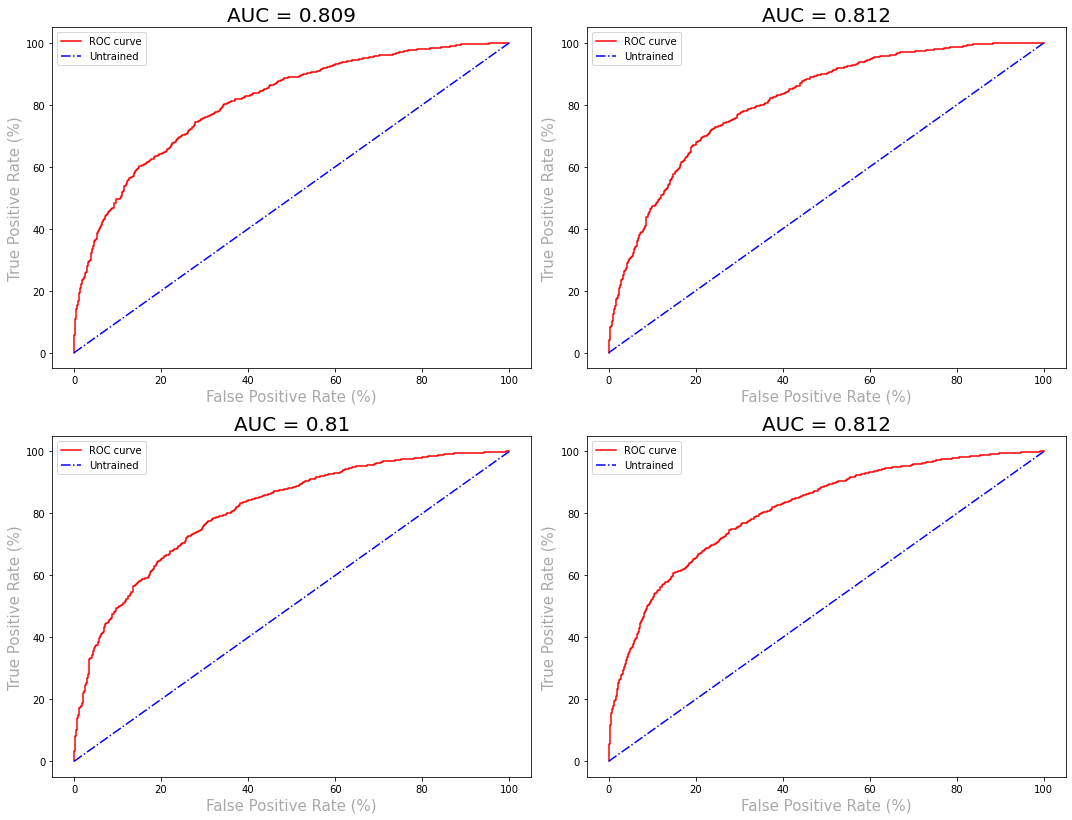

In [10]:
folds = KFold(n_splits = 4, shuffle = True)
fig, axes = plt.subplots(figsize = (15,11.5), nrows = 2, ncols = 2)

for ax, (train_ind, test_ind) in zip(axes.flatten(), folds.split(X)):
    X_tr, X_te = X.iloc[train_ind], X.iloc[test_ind]
    y_tr, y_te = y.iloc[train_ind], y.iloc[test_ind]
    
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    
    y_score = logreg.fit(X_tr, y_tr).decision_function(X_te)
    
    fpr, tpr, thresholds = roc_curve(y_te, y_score)
    auc_score = auc(fpr, tpr)
    
    ax.plot(fpr*100, tpr*100, color = 'r', label = 'ROC curve')
    ax.plot([0,100],[0,100], color = 'b', linestyle = '-.', label = 'Untrained')
    ax.set_xlabel('False Positive Rate (%)', fontsize = 15, color = 'darkgrey')
    ax.set_ylabel('True Positive Rate (%)', fontsize = 15, color = 'darkgrey')
    
    ax.set_title(f'AUC = {round(auc_score, 3)}',
                 fontsize = 20)
    
    ax.legend()

fig.tight_layout()

In [11]:
X.columns

Index(['blueWardsPlaced', 'blueFirstBlood', 'blueKills', 'blueAssists',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueAvgLevel',
       'blueCSPerMin', 'redKills', 'redAssists', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redCSPerMin', 'bluePredWinrate',
       'redPredWinrate', 'blueAvgPickrate', 'redAvgPickrate', 'blueHas62',
       'redHas62', 'blueHas111', 'redHas111', 'blueHas145', 'redHas145',
       'blueHas39', 'redHas39', 'blueHas517', 'redHas517', 'blueMaxLevel',
       'blueMinLevel', 'blueSTDLevels', 'redMaxLevel', 'redMinLevel',
       'redSTDLevels'],
      dtype='object')

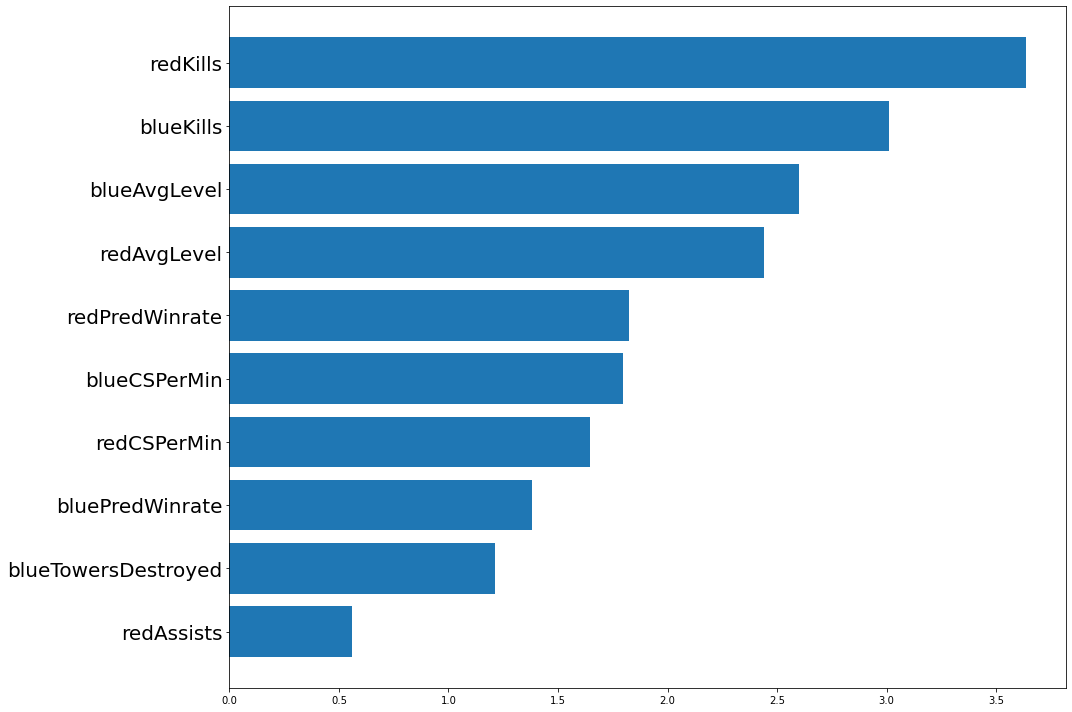

In [12]:
import matplotlib.pyplot as plt

to_plot = sorted(list(zip(X.columns, abs(logreg.coef_[0]))), key = lambda x: x[1])

fig, ax = plt.subplots(figsize = (15,10))
ax.barh(y = [x[0] for x in to_plot[-10:]], width = [x[1] for x in to_plot[-10:]])
plt.yticks(fontsize = 20)
fig.tight_layout();

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
logreg = LogisticRegression(fit_intercept = False, solver = 'saga')

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, solver='saga')

In [17]:
yhat_test = logreg.predict(X_test)

In [18]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = auc(fpr, tpr)

In [19]:
print(f'''Accuracy: {round(accuracy_score(y_test, yhat_test)*100, 1)}%
F1 Score: {round(f1_score(y_test, yhat_test)*100, 1)}%
Recall: {round(recall_score(y_test, yhat_test)*100, 1)}%
Precision: {round(precision_score(y_test, yhat_test)*100, 1)}%
ROC AUC: {round(auc_score, 1)*100}%''')

Accuracy: 73.1%
F1 Score: 73.7%
Recall: 74.2%
Precision: 73.3%
ROC AUC: 80.0%


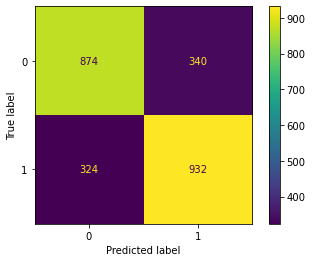

In [20]:
plot_confusion_matrix(logreg, X_test, y_test);

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer().fit(X_train)

In [22]:
tom = pd.read_csv('../../../../archive/tom.csv')

In [23]:
tom.drop(['Unnamed: 0','redVisionScore'], axis = 1, inplace = True)
tomx = tom.drop('blueWins', axis = 1)
tomy = tom['blueWins']

In [24]:
tomx = scaler.transform(imputer.transform(tomx))

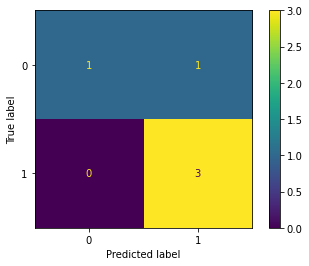

In [25]:
plot_confusion_matrix(logreg, tomx, tomy)

In [26]:
logreg.predict(tomx)

array([0, 1, 1, 1, 1], dtype=int64)

In [27]:
np.array(tomy)

array([0, 0, 1, 1, 1], dtype=int64)